<a href="https://colab.research.google.com/github/chr1s-b/m2r-fluids/blob/main/m2r_fluids_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make necessary imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Define difference equations:

In [2]:
def backward_euler(u, n, j, h, k):
    u[n+1, j] = u[n, j] - (k / (2*h)) * (u[n, j+1] - u[n, j-1])


def upwind(u, n, j, h, k): # is this correct form of one-sided?
    u[n+1, j] = u[n, j] - (k/h) * (u[n, j] - u[n, j-1])


def lax_friedrichs(u, n, j, h, k):
    u[n+1, j] = (1/2) * (u[n, j-1] + u[n, j+1]) - (k / (2*h)) * (u[n, j+1] - u[n, j-1])


def lax_wendroff(u, n, j, h, k):
    u[n+1, j] = u[n, j] - (k / (2*h)) * (u[n, j+1] - u[n, j-1]) + (k**2 / (2*h**2)) * (u[n, j+1] - 2*u[n, j] + u[n, j-1])


def beam_warming(u, n, j, h, k):
    u[n+1, j] = u[n, j] - (k / (2*h)) * (3*u[n, j] - 4*u[n, j-1] + u[n, j-2]) + (k**2 / (2*h**2)) * (u[n, j] - 2*u[n, j-1] + u[n, j-2])


Discretisation constants and final time to numerically solve for:

In [64]:
L = 3       # domain size
T = 0.5     # final time
h = 0.01    # mesh width
k = 0.5 * h # time step (wrt mesh ratio = 0.5 and h)

Define initial condition:

In [55]:
def u_0(y: np.ndarray):
    """Define initial condition at t=0."""
    return np.where(y <= 1, 1.0, 0.0)

Setup space:

In [65]:
x = np.arange(0, L, h)
t = np.arange(0, T, k)

Numerically solve:

In [66]:
def numerical_solution(u_0, x, t, h, k, difference_method): # more logical way to pass parameters?
    # calculate numerical solution
    u = np.zeros((len(t), len(x)))

    # apply initial condition
    u[0] = u_0(x)

    # numerically solve
    for n in range(len(t)-1):
        for j in range(1, len(x)-1):
            difference_method(u, n, j, h, k)
    return u

u = numerical_solution(u_0, x, t, h, k, lax_wendroff)

Apply the analytic solution for comparison:

In [67]:
# apply analytic solution
exact_solution = np.zeros((len(t), len(x)))
for n in range(len(t)):
    exact_solution[n] = u_0(x - t[n])

Do plotting:

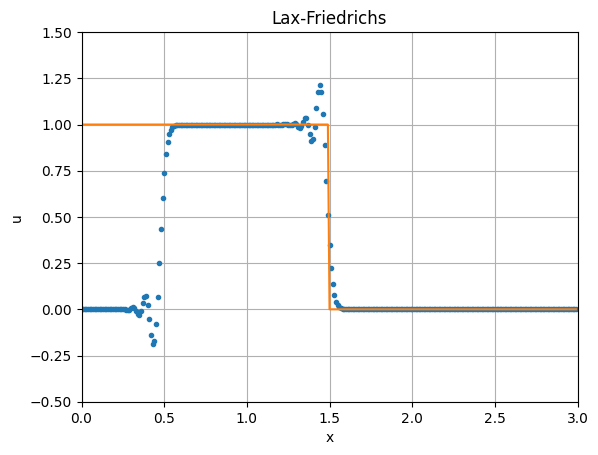

In [68]:
def method_to_name(method: callable) -> str:
    """Convert function to a name."""
    return method.__name__.replace("_", "-").title()


plt.title(f"{method_to_name(difference_method)}")
plt.xlabel("x")
plt.ylabel("u")
plt.xlim([0, L])
plt.ylim([-0.5, 1.5])
plt.plot(x, u[-1], '.')
plt.plot(x, exact_solution[-1])
plt.grid(True)
plt.show()

Animations:

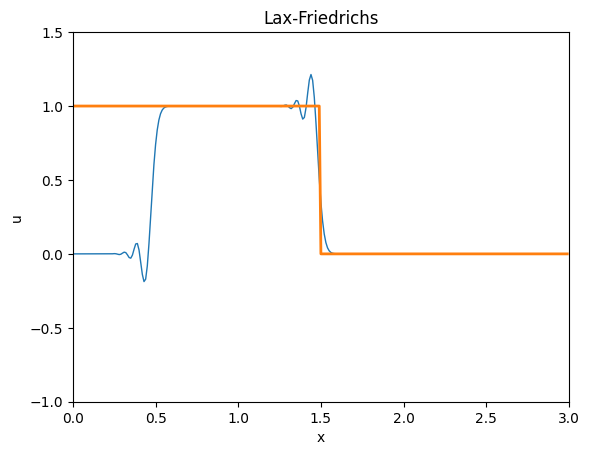

In [69]:
# get animations to display in google colab
from matplotlib import rc
rc('animation', html='jshtml')
# to display in jupyter, probably:
# %matplotlib notebook

def animate(x, u, exact_u, fig, ax, **kwargs):
    numeric, = ax.plot([], [], lw=1)
    exact, = ax.plot([], [], lw=2)

    def init():
        exact.set_data([], [])
        numeric.set_data([], [])
        return [exact, numeric]

    def update(i):
        exact.set_data(x, exact_u[i])
        numeric.set_data(x, u[i])
        return [exact, numeric]

    anim = FuncAnimation(fig, update, init_func=init, blit=True, frames=len(u), **kwargs)
    return fig, ax, anim

fig, ax = plt.subplots()
fig, ax, animation = animate(x, u, exact_solution, fig, ax, interval=10)
ax.set_title(method_to_name(difference_method))
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_xlim(0, L)
ax.set_ylim(-1, 1.5)
#animation.save(f"{method_to_name(difference_method)}_anim.gif", fps=1./k)
#plt.show() (if in normal python)
animation # to show in google colab/jupyter
